In [6]:
#Setup
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
import torchvision
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from torchvision.utils import save_image

TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(size=(200, 200)),
    transforms.ToTensor()
])

# train data
TRAIN_DATA_PATH = "./archive2/Training/"
data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
train_size = int(len(data) * 0.9)
val_size = len(data) - train_size
train_data, val_data = torch.utils.data.random_split(data, [train_size, val_size])
train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=64, shuffle=True)

# test data
TEST_DATA_PATH = "./archive2/Testing/"
test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG)
test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=64, shuffle=True)

# test data
# VAL_DATA_PATH = "./archive/Data/valid/"/
# val_data = torchvision.datasets.ImageFolder(root=VAL_DATA_PATH, transform=TRANSFORM_IMG)
validate_loader = torch.utils.data.DataLoader(
    val_data,
    batch_size=64, shuffle=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [7]:
# 1st model
class CNN(nn.Module):
    def __init__(self):
        self.name = 'CNN'
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 7, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(7, 12, 7)
        self.fc1 = nn.Linear(46*46*12, 32)
        self.fc2 = nn.Linear(32, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 46*46*12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [2]:
# 2nd model
class CNN2(nn.Module):
    def __init__(self):
        self.name = 'CNN2'
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 9)
        self.fc1 = nn.Linear(45*45*20, 32)
        self.fc2 = nn.Linear(32, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 45*45*20)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [8]:
def get_accuracy(model, data_loader, batch_size=64):

    correct = 0
    total = 0
    for imgs, labels in data_loader:


        #############################################
        #To Enable GPU Usage
        if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #############################################


        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def train(model, train_loader, validate_loader, batch_size=64, learning_rate=0.01, num_epochs=30):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in tqdm(range(num_epochs)):
        for imgs, labels in iter(train_loader):
            #To Enable GPU Usage
            if torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_loader, batch_size=batch_size)) # compute training accuracy
            val_acc.append(get_accuracy(model, validate_loader, batch_size=batch_size))  # compute validation accuracy
            n += 1
        print(("Epoch {}: Train acc: {} Val acc: {}").format(
            epoch + 1,
            train_acc[-1], val_acc[-1]))
    print("Iterations: {}".format(n))
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    return iters, losses, train_acc, val_acc

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: Train acc: 0.5787843592721641 Val acc: 0.6202090592334495
Epoch 2: Train acc: 0.7073170731707317 Val acc: 0.759581881533101
Epoch 3: Train acc: 0.8095238095238095 Val acc: 0.7770034843205574
Epoch 4: Train acc: 0.813395276809911 Val acc: 0.7630662020905923
Epoch 5: Train acc: 0.8803716608594657 Val acc: 0.7735191637630662
Epoch 6: Train acc: 0.9159891598915989 Val acc: 0.8257839721254355
Epoch 7: Train acc: 0.9570267131242741 Val acc: 0.8397212543554007
Epoch 8: Train acc: 0.9508323654665118 Val acc: 0.8257839721254355
Epoch 9: Train acc: 0.9589624467673248 Val acc: 0.8327526132404182
Epoch 10: Train acc: 0.9860627177700348 Val acc: 0.8466898954703833
Epoch 11: Train acc: 0.9790940766550522 Val acc: 0.818815331010453
Epoch 12: Train acc: 0.9833526906697638 Val acc: 0.8501742160278746
Epoch 13: Train acc: 0.9914827719705769 Val acc: 0.8641114982578397
Epoch 14: Train acc: 0.9570267131242741 Val acc: 0.8362369337979094
Epoch 15: Train acc: 0.9790940766550522 Val acc: 0.864111498

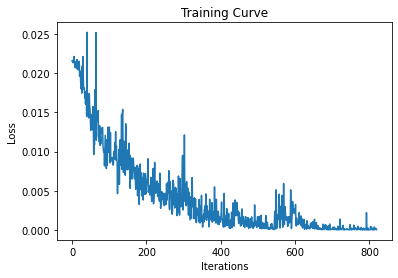

In [9]:
cnn = CNN()
cnn = cnn.to(device)
iters, losses, train_acc, val_acc = train(cnn, train_loader, validate_loader, batch_size=64, learning_rate=0.01, num_epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: Train acc: 0.3070073557878436 Val acc: 0.27177700348432055
Epoch 2: Train acc: 0.48625629113433994 Val acc: 0.4808362369337979
Epoch 3: Train acc: 0.5087108013937283 Val acc: 0.5087108013937283
Epoch 4: Train acc: 0.5292295780100658 Val acc: 0.5087108013937283
Epoch 5: Train acc: 0.5656213704994193 Val acc: 0.5435540069686411
Epoch 6: Train acc: 0.7684862562911343 Val acc: 0.7282229965156795
Epoch 7: Train acc: 0.7731320170344561 Val acc: 0.7456445993031359
Epoch 8: Train acc: 0.8250096786682153 Val acc: 0.8083623693379791
Epoch 9: Train acc: 0.8412698412698413 Val acc: 0.8118466898954704
Epoch 10: Train acc: 0.8335269066976384 Val acc: 0.7700348432055749
Epoch 11: Train acc: 0.859465737514518 Val acc: 0.818815331010453
Epoch 12: Train acc: 0.8312040263259776 Val acc: 0.7770034843205574
Epoch 13: Train acc: 0.7619047619047619 Val acc: 0.7456445993031359
Epoch 14: Train acc: 0.8432055749128919 Val acc: 0.7804878048780488
Epoch 15: Train acc: 0.8536585365853658 Val acc: 0.759581

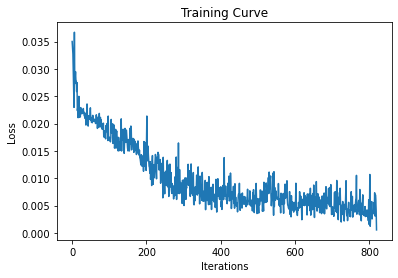

In [4]:
cnn2 = CNN2()
cnn2 = cnn2.to(device)
iters, losses, train_acc, val_acc = train(cnn2, train_loader, validate_loader, batch_size=64, learning_rate=0.02, num_epochs=20)

In [5]:
get_accuracy(cnn2, test_loader)

0.39593908629441626

In [12]:
torch.save(cnn.state_dict(), "model_xxx.pt")

In [3]:
# 3rd model, TL with vgg16
model = models.vgg16(pretrained=True)
model
# Freeze early layers
for param in model.parameters():
    param.requires_grad = False
n_inputs = model.classifier[6].in_features

# Add on classifier
model.classifier[6] = nn.Sequential(
    nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.2),
    nn.Linear(256, 4), nn.LogSoftmax(dim=1))

model = model.to(device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1: Train acc: 0.81068524970964 Val acc: 0.7770034843205574
Epoch 2: Train acc: 0.8021680216802168 Val acc: 0.7665505226480837
Epoch 3: Train acc: 0.7859078590785907 Val acc: 0.7456445993031359
Epoch 4: Train acc: 0.7723577235772358 Val acc: 0.710801393728223
Epoch 5: Train acc: 0.799845141308556 Val acc: 0.7526132404181185
Iterations: 205


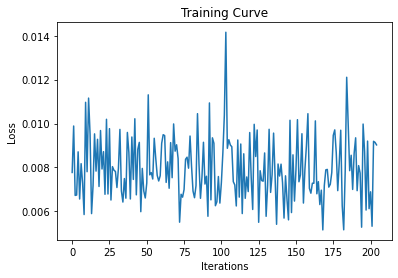

In [6]:
iters, losses, train_acc, val_acc = train(model, train_loader, validate_loader, batch_size=64, learning_rate=0.01, num_epochs=5)

In [7]:
get_accuracy(model, test_loader)

0.5558375634517766